In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,120
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,212
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,511
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,334
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,7


In [3]:
countries = df.iloc[:5,4:71]
countries

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
0,0,0,0,0,0,0,0,0,0,0,...,22,24,24,40,40,74,84,94,110,110
1,0,0,0,0,0,0,0,0,0,0,...,64,70,76,89,104,123,146,174,186,197
2,0,0,0,0,0,0,0,0,0,0,...,87,90,139,201,230,264,302,367,409,454
3,0,0,0,0,0,0,0,0,0,0,...,53,75,88,113,133,164,188,224,267,308
4,0,0,0,0,0,0,0,0,0,0,...,0,1,2,2,3,3,3,4,4,5


In [4]:
c_trans = countries.transpose()
c_trans

,0,1,2,3,4
1/22/20,0,0,0,0,0
1/23/20,0,0,0,0,0
1/24/20,0,0,0,0,0
1/25/20,0,0,0,0,0
1/26/20,0,0,0,0,0
...,...,...,...,...,...
3/24/20,74,123,264,164,3
3/25/20,84,146,302,188,3
3/26/20,94,174,367,224,4
3/27/20,110,186,409,267,4


In [5]:
c_trans.columns = ['Afganistan','Albania','Algeria','Andorra','Angola']
c_trans.head()

,Afganistan,Albania,Algeria,Andorra,Angola
1/22/20,0,0,0,0,0
1/23/20,0,0,0,0,0
1/24/20,0,0,0,0,0
1/25/20,0,0,0,0,0
1/26/20,0,0,0,0,0


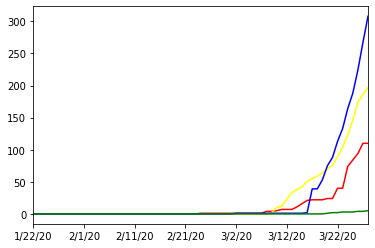

In [6]:
c_trans['Afganistan'].plot(kind='line',color='red')
c_trans['Albania'].plot(kind='line', color='yellow')
c_trans['Andorra'].plot(kind='line', color='blue')
c_trans['Angola'].plot(kind='line',color='green')

In [7]:
c_trans.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20'],
      dtype='object')

## Linear Regression

In [8]:
reg = c_trans.copy()

In [9]:
reg1 = reg.loc[reg.sum(axis=1) >= 1]
reg1

,Afganistan,Albania,Algeria,Andorra,Angola
2/24/20,1,0,0,0,0
2/25/20,1,0,1,0,0
2/26/20,1,0,1,0,0
2/27/20,1,0,1,0,0
2/28/20,1,0,1,0,0
2/29/20,1,0,1,0,0
3/1/20,1,0,1,0,0
3/2/20,1,0,3,1,0
3/3/20,1,0,5,1,0
3/4/20,1,0,12,1,0


In [10]:
reg1['Days'] = range(1,35)
reg1['LogInfections'] = np.log(reg.Afganistan)
reg1

/Users/maitu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/maitu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/maitu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Afganistan,Albania,Algeria,Andorra,Angola,Days,LogInfections
2/24/20,1,0,0,0,0,1,0.000000
2/25/20,1,0,1,0,0,2,0.000000
2/26/20,1,0,1,0,0,3,0.000000
2/27/20,1,0,1,0,0,4,0.000000
2/28/20,1,0,1,0,0,5,0.000000
2/29/20,1,0,1,0,0,6,0.000000
3/1/20,1,0,1,0,0,7,0.000000
3/2/20,1,0,3,1,0,8,0.000000
3/3/20,1,0,5,1,0,9,0.000000
3/4/20,1,0,12,1,0,10,0.000000


In [11]:
x = reg1.Days
x = sm.add_constant(x)
y = reg1.LogInfections

/Users/maitu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [12]:
mod = sm.OLS(y,x)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          LogInfections   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     480.5
Date:                Mon, 30 Mar 2020   Prob (F-statistic):           7.71e-21
Time:                        18:29:22   Log-Likelihood:                -19.202
No. Observations:                  34   AIC:                             42.40
Df Residuals:                      32   BIC:                             45.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0560      0.154     -6.863      0.000      -1.369      -0.743
Days           0.1681      0.008     21.919      0.000       0.152       0.184
==============================================================================
Omnibus:                        4.735   Durbin-Watson:                   0.415
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                3.231
Skew:                          -0.662   Prob(JB):                        0.199
Kurtosis:                       3.727   Cond. No.                         41.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
x0 = np.exp(-1.0560)

In [14]:
b = np.exp(0.1681)

In [15]:
## mi funcion y=exp(-6.4354)*exp(0.1681)**t
## y = a + b*x
## logx(t)=log(x0)+log(b)*t
## log del numero de infectados 
## y log del factor de crecimiento

In [16]:
def linear_predictions(t):
    return x0*b**t

In [17]:
reg1['Predictions'] = reg1.Days.apply(linear_predictions)
reg1

/Users/maitu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Afganistan,Albania,Algeria,Andorra,Angola,Days,LogInfections,Predictions
2/24/20,1,0,0,0,0,1,0.000000,0.411519
2/25/20,1,0,1,0,0,2,0.000000,0.486850
2/26/20,1,0,1,0,0,3,0.000000,0.575970
2/27/20,1,0,1,0,0,4,0.000000,0.681404
2/28/20,1,0,1,0,0,5,0.000000,0.806138
2/29/20,1,0,1,0,0,6,0.000000,0.953706
3/1/20,1,0,1,0,0,7,0.000000,1.128286
3/2/20,1,0,3,1,0,8,0.000000,1.334825
3/3/20,1,0,5,1,0,9,0.000000,1.579171
3/4/20,1,0,12,1,0,10,0.000000,1.868246


In [18]:
reg1.iloc[:,[0,7]]

,Afganistan,Predictions
2/24/20,1,0.411519
2/25/20,1,0.486850
2/26/20,1,0.575970
2/27/20,1,0.681404
2/28/20,1,0.806138
2/29/20,1,0.953706
3/1/20,1,1.128286
3/2/20,1,1.334825
3/3/20,1,1.579171
3/4/20,1,1.868246


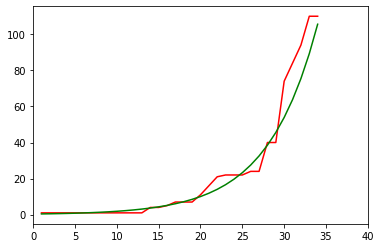

In [19]:
plt.plot(reg1['Days'],reg1['Afganistan'], c='red')
plt.plot(reg1['Days'],reg1['Predictions'], c='green')
plt.xlim(0,40)
plt.show()

In [20]:
##future_predictions
t = 100
cases = x0*b**t
cases

6948247.309129155